In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 확률밀도함수
from scipy.stats import norm

# 최적화
from scipy.optimize import minimize

# 실습예제 2
- 지수 로그 함수 사용

In [ ]:
rawData = np.load('/content/drive/MyDrive/멀티캠퍼스/data/moore.npz')
x=rawData['X']
y=rawData['y']

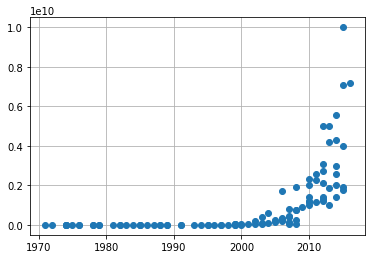

In [ ]:
plt.plot(x, y, 'o')
plt.grid()
plt.show()

지수 로그함수 사용

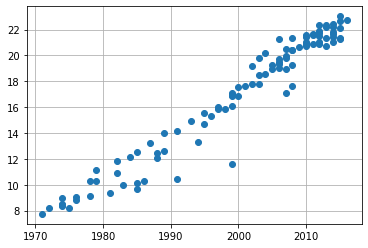

In [ ]:
logY = np.log(y)
plt.plot(x, logY, 'o')
plt.grid()
plt.show()

In [ ]:
def error(beta):
  yhat = beta[0] + beta[1] * x
  return np.sum( (logY - yhat) ** 2 )

def grad_b0(beta):
  return np.sum(-2 * x * (-beta[1] * x - beta[0] + logY))

def grad_b1(beta):
  return np.sum(2 * beta[1] * x + 2 * beta[0] - 2 * logY)

In [ ]:
beta = [ 0, 0 ]
result = minimize( error, beta )
result.x

array([-6.84654467e+02,  3.50870636e-01])

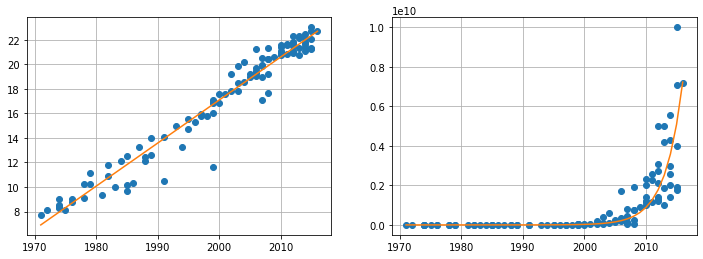

In [ ]:
w = result.x
plt.figure( figsize=(12,4) )

plt.subplot(1, 2, 1)
plt.plot(x, logY, 'o')
plt.plot(x, w[0] + w[1] * x )
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x, y, 'o')
plt.plot(x, np.exp(w[0] + w[1] * x) )
plt.grid()

plt.show()

# 일반화선형모형

In [ ]:
from sklearn import datasets

In [ ]:
x, y = datasets.make_classification(
  n_samples = 6, n_features= 2, n_classes=2, random_state=25,
  n_informative=1, n_redundant=0, n_clusters_per_class=1,
) # y는 클래스가 2개라 0 아니면 1값 가짐

In [ ]:
np.c_[y,x]

array([[ 1.        , -0.23231186,  1.07376638],
       [ 1.        , -1.33466147,  1.02774133],
       [ 1.        ,  2.1529569 ,  1.11939849],
       [ 0.        , -0.92073444, -1.31059391],
       [ 0.        , -2.05323076, -0.91555323],
       [ 0.        ,  0.86858305, -0.62011478]])

In [ ]:
sample=pd.DataFrame(np.c_[y,x],columns=['y','x1','x2'])
sample
#y가 범주형

,y,x1,x2
0,1.0,-0.232312,1.073766
1,1.0,-1.334661,1.027741
2,1.0,2.152957,1.119398
3,0.0,-0.920734,-1.310594
4,0.0,-2.053231,-0.915553
5,0.0,0.868583,-0.620115


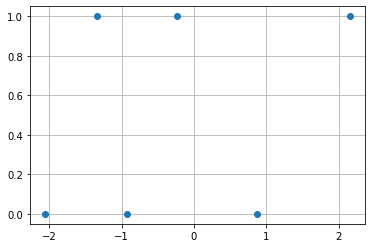

In [ ]:
plt.plot(sample['x1'],sample['y'],'o')
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(sample[['x1']],sample['y'])

LinearRegression()

In [ ]:
model.coef_

array([0.11304748])

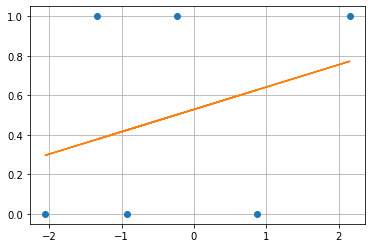

In [ ]:
plt.plot(sample['x1'],sample['y'],'o')
plt.plot(sample['x1'],model.predict(sample[['x1']]))
plt.grid()
plt.show()
# 의미가 없음

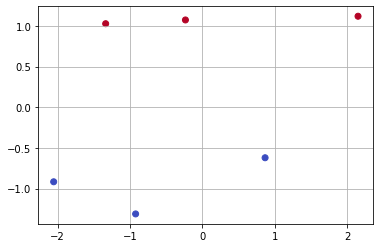

In [ ]:
plt.scatter(sample['x1'],sample['x2'],c=sample['y'],cmap='coolwarm')
plt.grid()

plt.show()
# 0파란색 1빨간색
# 분류모형

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(sample[['x1', 'x2']],sample['y'])

LogisticRegression()

In [ ]:
pd.DataFrame(np.c_[y,model.predict_proba(sample[['x1','x2']])],columns=['y','0','1'])
#y가 0일 확률과 1일 확률을 나타냄

,y,0,1
0,1.0,0.224322,0.775678
1,1.0,0.265428,0.734572
2,1.0,0.160384,0.839616
3,0.0,0.861946,0.138054
4,0.0,0.819000,0.181000
5,0.0,0.668922,0.331078


## 선형회귀 일반화
- 베르누이 분포를 따르고 있는 상황
- 정규분포를 따를 수 있게끔,,

누적분포함수 사용 = logit 함수

In [ ]:
def logit(x):
  return 1 / (1 + np.exp(-x))

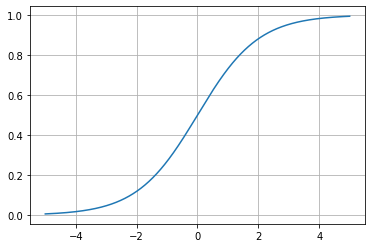

In [ ]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, logit(x))
plt.grid()
plt.show()

### 예제
- cut-off value를 0.5로 설정해서 판단하기
- 분류 모형의 최적화
- logit 함수와 크로스 엔트로피 직접 정의

In [ ]:
from scipy.optimize import minimize

In [ ]:
def logit(x):
  return 1/(1+np.exp(-x))

def cross_entropy(beta):
  yhat=logit(beta[0]+beta[1]*sample['x1']+beta[2]*sample['x2'])
  return np.sum(-y*np.log(yhat)-(1-y)*np.log(1-yhat))

In [ ]:
beta=[0,0,0]
result=minimize(cross_entropy,beta)
result.x

array([-2.53524181, -0.71598003, 14.82702594])

In [ ]:
xy1, xy2 = np.meshgrid(
    np.arange(x[:,0].min() - 0.1, x[:,0].max() + 0.1, 0.01), 
    np.arange(x[:,1].min() - 0.1 , x[:,1].max() + 0.1 , 0.01)
)

beta = result.x
xx = np.c_[xy1.flatten(), xy2.flatten()]
yhat = logit( np.dot(xx, beta[1:])+ beta[0])

plt.figure( figsize=(8, 4) )
plt.scatter( sample['x1'], sample['x2'], c=sample['y'], cmap='coolwarm' )
plt.contourf(xy1, xy2, yhat.reshape(xy1.shape), cmap='coolwarm', alpha=0.5)
plt.grid()
plt.show()

IndexError: ignored

- 위 그림을 통해 어느 부분이 파란색 빨간색인지 판단 가능
- 연속형이 아니기 때문에 적합성은 개수나 비율로 따질 수 있음

# 분류모형
- 불균형 데이터
- 비율이 5:5 정도인 형태가 가장 이상적

In [ ]:
x, y = datasets.make_classification(
  n_samples = 1000, weights=[0.9, 0.1], n_features= 2, n_classes=2, random_state=25,
  n_informative=1, n_redundant=0, n_clusters_per_class=1,
)

In [ ]:
sample = np.c_[y, x]
sample = pd.DataFrame( sample, columns=['y', 'x1', 'x2'])
sample.head(2)

,y,x1,x2
0,0.0,1.568390,-0.341790
1,0.0,-0.001372,-2.044255


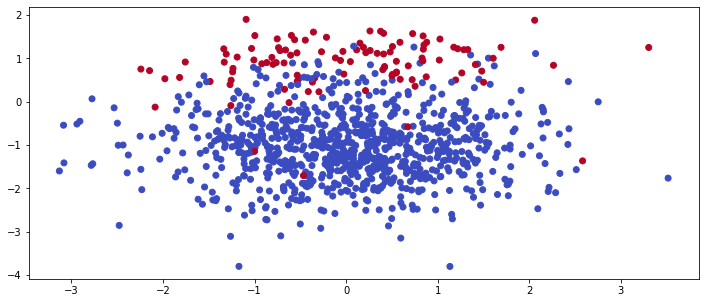

In [ ]:
# 90프로가 1, 10프로가 0일때
# 평가가 제대로 안될 것을 예상하고 진행
plt.figure( figsize=(12,5) )
plt.scatter( sample['x1'], sample['x2'], c=sample['y'], cmap='coolwarm')

직접 추정

In [ ]:
def logit(x):
  return 1 / (1 + np.exp(-x))

def cross_entropy( beta ):
  yhat = logit( beta[0] + beta[1] * sample['x1'] + beta[2] * sample['x2'] )
  return np.sum( -y * np.log(yhat) - (1 - y) * np.log(1 - yhat) )

In [ ]:
beta=[0,0,0]
result=minimize(cross_entropy,beta)
result.x

array([-2.22542567, -0.19049369,  3.3843793 ])

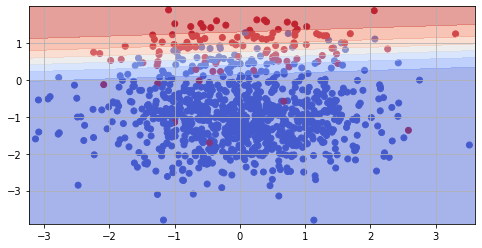

In [ ]:
xy1, xy2 = np.meshgrid(
    np.arange(x[:,0].min() - 0.1, x[:,0].max() + 0.1, 0.01), 
    np.arange(x[:,1].min() - 0.1 , x[:,1].max() + 0.1 , 0.01)
)

beta = result.x
xx = np.c_[xy1.flatten(), xy2.flatten()]
yhat = logit( np.dot(xx, beta[1:])+ beta[0])

plt.figure( figsize=(8, 4) )
plt.scatter( sample['x1'], sample['x2'], c=sample['y'], cmap='coolwarm' )
plt.contourf(xy1, xy2, yhat.reshape(xy1.shape), cmap='coolwarm', alpha=0.5)
plt.grid()
plt.show()

- 제대로 분류가 안된 경우가 존재

## 평가 방법

In [ ]:
beta

array([-2.22542567, -0.19049369,  3.3843793 ])

In [ ]:
def cut_off(y, threshold):
  y = y.copy()
  y[ y > threshold ] = 1
  y[ y < threshold ] = 0

  return y.astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_predict=logit(beta[0]+beta[1]*sample['x1'] + beta[2]*sample['x2'])
y_predict = cut_off( y_predict, 0.5 )
cmat=confusion_matrix(y,y_predict)
cmat # 0을 0으로 분류한건 877개, 1을 1로 분류한 건 72개

array([[877,  18],
       [ 33,  72]])

## Accuracy 계산하기

In [ ]:
(cmat[0,0] + cmat[1,1]) /np.sum(cmat) 
# 그치만 accuracy만 봤을 땐 분석이 잘된 것처럼 보임

0.949

따라서 Accuracy가 정확한 지표가 될 순 없다!

## Precision

In [ ]:
precision1 = cmat[0,0]/(cmat[0,0]+cmat[0,1]) # 0 파악 98프로
precision1

0.9798882681564246

In [ ]:
precision2=cmat[1,1]/(cmat[1,0]+cmat[1,1]) #1 파악 69프로
precision2 # 절대 좋은 모형이라 볼 수 없음

0.6857142857142857

## Recall

In [ ]:
recall1= cmat[0,0] / (cmat[0,0]+cmat[1,0])
recall1

0.9637362637362638

In [ ]:
recall2=cmat[1,1] / (cmat[0,1]+cmat[1,1])

recall2 #실제 1이 1으로 분류된 경우

0.8

## F1-score
- 데이터가 불균형일 경우에는 F1 score가 모형의 적합성을 더 잘 나타낸다!
- 그치만 모든 지표들을 확인해봐야함

In [ ]:
2 * (precision1 * recall1) / (precision1 + recall1)

0.9717451523545707

In [ ]:
2 * (precision2 * recall2) / (precision2 + recall2)

0.7384615384615385

## ROC Curve

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_curve, roc_auc_score, recall_score

시각화

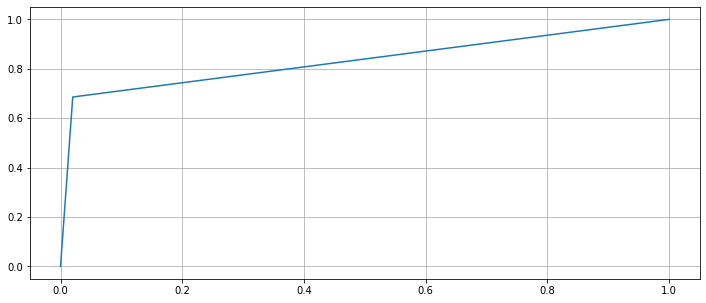

In [ ]:
fpr, tpr, _ = roc_curve(y, y_predict)
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr) # x축이 false positive, y축이 true positive
plt.grid()
plt.show()
# 좌측 상단에 가까울수록 좋은 모형이라고 볼 수 있음

In [ ]:
roc_auc_score(y, y_predict)

0.8328012769353552

# 과적합

In [ ]:
from sklearn import datasets

In [ ]:
train=pd.read_csv('/content/sample_data/california_housing_train.csv')
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
test=pd.read_csv('/content/sample_data/california_housing_test.csv')
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


## 다중공산성 줄이기
1. 상관관계
- 입력변수들은 독립적이어야 함
2. 인과관계
- 입력변수들은 다른 입력변수들과 인과관계가 없어야 함

### 상관계수
- 수치가 높다고 상관관계가 있다고 판단하기엔 무리가 있음

In [ ]:
features = train.drop( columns=['median_house_value', 'longitude', 'latitude'])

In [ ]:
features.corr().style.background_gradient().set_precision(2)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
housing_median_age,1.00,-0.36,-0.32,-0.30,-0.30,-0.12
total_rooms,-0.36,1.00,0.93,0.86,0.92,0.20
total_bedrooms,-0.32,0.93,1.00,0.88,0.98,-0.01
population,-0.30,0.86,0.88,1.00,0.91,-0.00
households,-0.30,0.92,0.98,0.91,1.00,0.01
median_income,-0.12,0.20,-0.01,-0.00,0.01,1.00


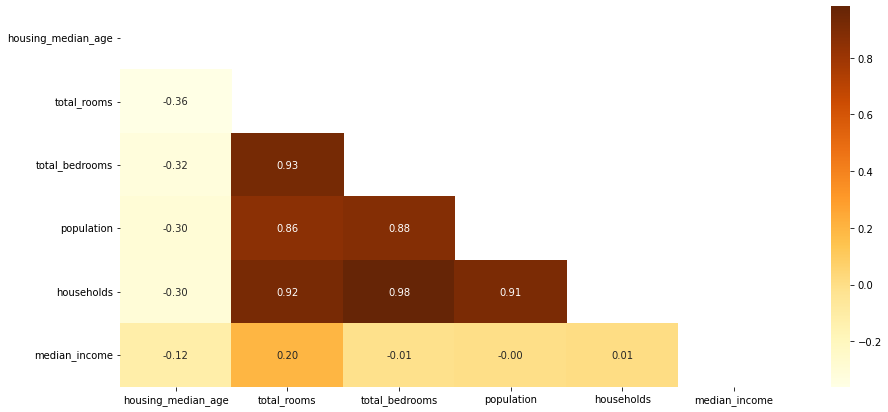

In [ ]:
plt.figure( figsize=(15, 7) )
mask = np.zeros_like(features.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(features.corr(), annot=True, fmt='.2f', mask=mask, cmap='YlOrBr')
plt.show()

### 인과관계
- 선형회귀 진행
- VIF 라이브러리 사용

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vifFrame = pd.DataFrame()
vifFrame['vif factor'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vifFrame['features']=features.columns
vifFrame
# 점수가 제일 높은거부터 제외시키기
# 10 이상이면 입력변수들과 인과관계가 존재하는것이므로 삭제해야함

,vif factor,features
0,3.574735,housing_median_age
1,27.014005,total_rooms
2,89.215256,total_bedrooms
3,15.802222,population
4,95.172568,households
5,4.805563,median_income


In [ ]:
features = train.drop( columns=['median_house_value', 'longitude', 'latitude','households','total_rooms','total_bedrooms'])

vifFrame = pd.DataFrame()
vifFrame['vif factor'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vifFrame['features']=features.columns
vifFrame

,vif factor,features
0,2.885765,housing_median_age
1,2.027615,population
2,3.344828,median_income


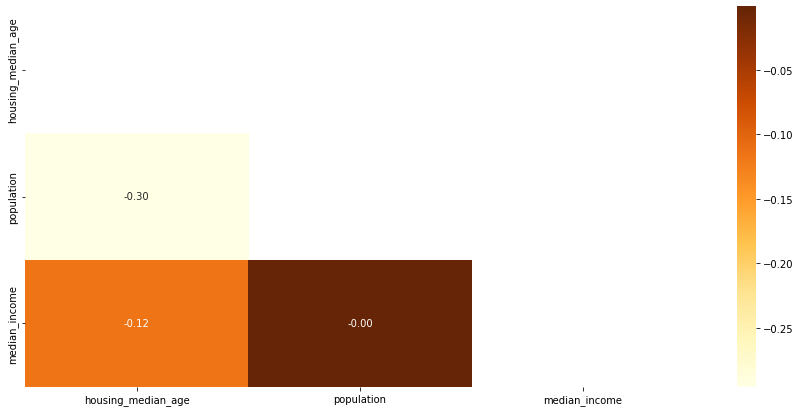

In [ ]:
plt.figure( figsize=(15, 7) )
mask = np.zeros_like(features.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(features.corr(), annot=True, fmt='.2f', mask=mask, cmap='YlOrBr')
plt.show()

### 다중선형회귀

In [ ]:
train_features = train.drop( columns=['median_house_value', 'longitude', 'latitude'])
train_target = train['median_house_value']
test_features = test.drop( columns=['median_house_value', 'longitude', 'latitude'])
test_target = test['median_house_value']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit( train_features, train_target )

LinearRegression()

In [ ]:
print(model.coef_)
print(train_features.columns)

[ 1.88001408e+03 -1.99559207e+01  9.95247716e+01 -3.50182347e+01
  1.27225320e+02  4.80334593e+04]
Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income'],
      dtype='object')


In [ ]:
pd.DataFrame(np.array([model.coef_, train_features.columns]).T,columns=['coef','features'])

# 다른 변수들보다 median income의 상관계수값이 크므로 과적합이 보여짐
# 집값과의 연관성을 봤을 때 ,, 모델이 제대로 만들어지진 않은듯

,coef,features
0,1880.014083,housing_median_age
1,-19.955921,total_rooms
2,99.524772,total_bedrooms
3,-35.018235,population
4,127.22532,households
5,48033.459277,median_income


학습 정확도

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# 1
print(model.score(train_features,train_target))

# 2
yhat=model.predict(train_features)
print(r2_score(train_target,yhat))


# 정확도가 낮음. 학습자료조차 제대로 설명을 못하고 있는 상황
# 아니면 과적합? 그치만 과적합이라면 학습 정확도가 높아야함
# 선형적인 관계보단 비선형 관계가 좀 더 크지 않을까?

0.5713482748283873
0.5713482748283873


검증 정확도

In [ ]:
model.score(test_features,test_target)
# 학습정확도와 검증정확도는 비슷하게 낮음 ㅋ

0.5458835346746116

잔차의 분포 ((매우 중요))

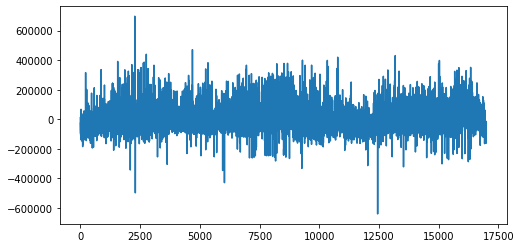

In [ ]:
residual = train_target - yhat
plt.figure(figsize=(8,4))
plt.plot(residual)

# 얼핏 보면 화이트노이즈 같지만 편차가 너무 큼!!!!

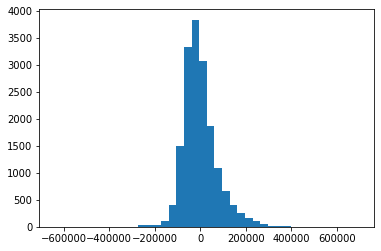

In [ ]:
plt.hist(residual,bins=40)
plt.show()

#### 다중공산성 제거한 경우

In [ ]:
train_features = train.drop( columns=['median_house_value', 'longitude', 'latitude', 'households', 'total_bedrooms', 'total_rooms'])
train_target = train['median_house_value']
test_features = test.drop( columns=['median_house_value', 'longitude', 'latitude', 'households', 'total_bedrooms', 'total_rooms'])
test_target = test['median_house_value']

In [ ]:
model = LinearRegression()
model.fit( train_features, train_target )

LinearRegression()

In [ ]:
pd.DataFrame( np.array([ model.coef_, train_features.columns ]).T, columns=['coef', 'features'] )

,coef,features
0,1833.310985,housing_median_age
1,3.180376,population
2,43457.282207,median_income


학습 정확도

In [ ]:
model.score(train_features, train_target)

0.5150206852133975

검증 정확도

In [ ]:
model.score(test_features, test_target)

0.48969758402160346

## 변수선택법

In [ ]:
import math
math.factorial(6)

#720가지의 조합으로 모형 만들어보고 제일 좋은 모형 선정해야함,,

720

현실적인 방법은?
- 전진선택법
- 후진제거법
- 단계적 선택법(전진+후진)

### 노이즈 변수
- 랜덤 설정으로 아무 의미 없는 변수 생성

In [ ]:
train_features = train.drop( columns=['median_house_value', 'longitude', 'latitude'])
train_target = train['median_house_value']
test_features = test.drop( columns=['median_house_value', 'longitude', 'latitude'])
test_target = test['median_house_value']

In [ ]:
train_features.shape

(17000, 6)

In [ ]:
np.random.seed(123)
colname = np.array([f'random_{i}' for i in range(1, 11)])
randFrame = pd.DataFrame( np.random.randint(1, 100, size=(17000, 10)), columns=colname)
randFrame
# 이걸 기존의 트레인 피쳐에 합치기
train_features=pd.concat([train_features,randFrame],axis=1)
train_features.head(2)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,random_1,random_2,random_3,random_4,random_5,random_6,random_7,random_8,random_9,random_10
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936,67,93,99,18,84,58,87,98,97,48
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200,74,33,47,97,26,84,79,37,97,81


### 전진선택법

In [ ]:
def adjustedR2( r2, x ):
  if x.ndim == 1: p, n = 1, x.shape[0]
  else: p, n = x.shape[1], x.shape[0]
  return 1 - (1-r2) * (n-1) / (n-p-1)

In [ ]:
train_features.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'random_1', 'random_2', 'random_3',
       'random_4', 'random_5', 'random_6', 'random_7', 'random_8', 'random_9',
       'random_10'],
      dtype='object')

In [ ]:
columns = ['median_income']
model = LinearRegression()
model.fit(train_features[columns], train_target)

LinearRegression()

In [ ]:
model.score(train_features[columns], train_target)

0.011397208019458094

In [ ]:
#median income
model.score(train_features[columns], train_target)

0.478684932375828

이런 식으로 점수 파악하기
그치만 이렇게 안하고 자동화 시킬것~

In [ ]:
def adjustedR2( r2, x ):
  if x.ndim == 1: p, n = 1, x.shape[0]
  else: p, n = x.shape[1], x.shape[0]
  return 1 - (1-r2) * (n-1) / (n-p-1)

In [ ]:
def forward( x, y, selected_columns ):
  forward_columns = [ col for col in train_features.columns if col not in selected_columns ]
  result = []
  for col in forward_columns:
    columns = selected_columns + [col]
    model = LinearRegression()
    model.fit( x[columns], y )
    r2 = model.score( x[columns], y )
    adjr2 = adjustedR2( r2, x[columns] )
    result.append( {'score': adjr2, 'features': columns} )
  
  tmp = pd.DataFrame( result )
  best = tmp.loc[ tmp.score.argmax() ]
  return best

In [ ]:
selected_columns =['median_income','housing_median_age','total_bedrooms', 'population','total_rooms','households', 'random_3','random_6']
ret=forward(train_features,train_target,selected_columns)
print(ret['score'])
print(ret['features'])

0.5713099109439067
['median_income', 'housing_median_age', 'total_bedrooms', 'population', 'total_rooms', 'households', 'random_3', 'random_6', 'random_2']


이 과정을 자동화하기

In [ ]:
def forward_select(x, y):
  selected_columns = []

  for i in range(0, x.shape[1] ):
    model = forward( x, y, selected_columns )

    if i == 0: best_model = model
    else:
      if best_model.score < model.score: best_model = model
      else: break
    selected_columns = best_model.features
  
  return best_model

In [ ]:
ret=forward_select(train_features,train_target)
print(ret.score)
print(ret.features)

0.5713196236325444
['median_income', 'housing_median_age', 'total_bedrooms', 'population', 'total_rooms', 'households', 'random_3', 'random_6']


### 후진선택법

In [ ]:
from itertools import combinations

In [ ]:
selected_columns = train_features.columns

for combi in combinations( selected_columns, len(selected_columns) - 1):
  print(combi)

('housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 'random_6', 'random_7', 'random_8', 'random_9')
('housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 'random_6', 'random_7', 'random_8', 'random_10')
('housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 'random_6', 'random_7', 'random_9', 'random_10')
('housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 'random_6', 'random_8', 'random_9', 'random_10')
('housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 

In [ ]:
def backward( x, y, selected_columns ):

  result = []
  for combi in combinations( selected_columns, len(selected_columns) - 1):
    columns = list(combi)
    model = LinearRegression()
    model.fit( x[columns], y )
    r2 = model.score( x[columns], y )
    adjr2 = adjustedR2( r2, x[columns] )
    result.append( {'score': adjr2, 'features': columns} )
  
  tmp = pd.DataFrame( result )
  best = tmp.loc[ tmp.score.argmax() ]
  return best

In [ ]:
def backward_drop(x, y):
  selected_columns = x.columns

  for i in range(0, x.shape[1] ):
    model = backward( x, y, selected_columns )

    if i == 0: best_model = model
    else:
      if best_model.score < model.score: best_model = model
      else: break
    selected_columns = best_model.features
  
  return best_model

In [ ]:
ret = backward_drop( train_features, train_target )
print( ret.score )
print( ret.features)

0.5713196236325442
['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_3', 'random_6']


## 단계선택법

In [ ]:
def step_wise(x, y):
  selected_columns = []

  for i in range(0, x.shape[1] ):
    forward_model = forward( x, y, selected_columns )
    selected_columns = forward_model.features

    if i < 2: best_model = forward_model; continue

    backward_model = backward( x, y, selected_columns )
    large_model = forward_model
    if forward_model.score < backward_model.score: 
      large_model = backward_model
      selected_columns = backward_model.features
    
    if best_model.score < large_model.score: best_model = large_model
    else: break
  
  return best_model

In [ ]:
ret = step_wise( train_features, train_target )
print( ret.score )
print( ret.features)

0.5713196236325444
['median_income', 'housing_median_age', 'total_bedrooms', 'population', 'total_rooms', 'households', 'random_3', 'random_6']


## 변수 설명력

### eli5

In [ ]:
!pip install eli5 shap

     |████████████████████████████████| 106 kB 5.5 MB/s 
     |████████████████████████████████| 564 kB 11.9 MB/s 


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

import shap

In [ ]:
model=LinearRegression()
model.fit(train_features,train_target)

LinearRegression()

In [ ]:
eli5.show_weights( model, feature_names=train_features.columns.tolist() )

Weight?,Feature
+48019.614,median_income
+1880.378,housing_median_age
+127.320,households
+99.355,total_bedrooms
+40.816,random_3
+33.901,random_6
+12.490,random_5
+12.076,random_8
+8.892,random_4
+3.402,random_7


- bias = y절편
- 15개의 항목이 의미가 있다고 말함 
- 근데 저기에 랜덤변수들도 존재

### permutation importance

In [ ]:
perm = PermutationImportance( model, random_state=123).fit(train_features, train_target )
eli5.show_weights( perm, feature_names=train_features.columns.tolist() )

Weight,Feature
1.2508 ± 0.0225,median_income
0.3576 ± 0.0088,households
0.2801 ± 0.0049,total_rooms
0.2603 ± 0.0064,total_bedrooms
0.2358 ± 0.0086,population
0.0843 ± 0.0055,housing_median_age
0.0002 ± 0.0002,random_3
0.0001 ± 0.0001,random_6
0.0000 ± 0.0000,random_2
0.0000 ± 0.0001,random_8


- 랜덤변수들은 의미가 없다고 보여짐

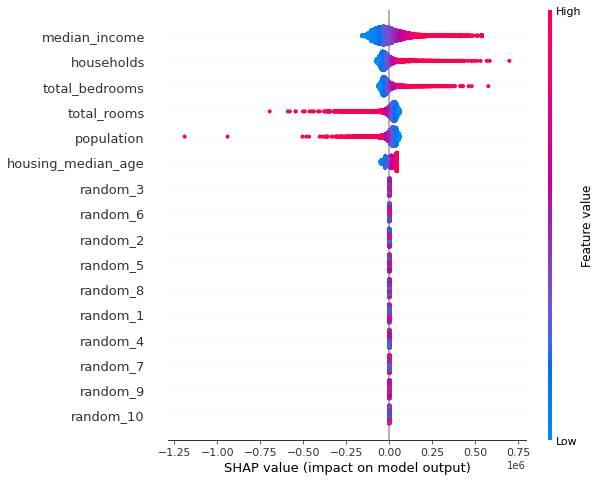

In [ ]:
explainer = shap.LinearExplainer(model, train_features)
shap_value = explainer.shap_values( train_features )
shap.summary_plot( shap_value, train_features )

방의 수가 적을수록 집값이 높아지고, 침실 늘수록 집값 커자고 등등

### Recursive Feature Elimination 

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn import feature_selection
feature_selector = RFE( model, n_features_to_select=4)
feature_selector = feature_selector.fit( train_features, train_target )

In [ ]:
feature_selector.n_features_

4

In [ ]:
feature_selector.support_

array([ True, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False])

In [ ]:
train_features.columns[ feature_selector.support_ ]

Index(['housing_median_age', 'households', 'median_income', 'random_3'], dtype='object')

## 정규화
- 회귀계수 줄이기

In [268]:
np.random.seed(123)

x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x) + (np.random.randn(1000)/5)

x_train = np.linspace(0, 1, 10)
y_train = np.sin(2 * np.pi * x_train) + (np.random.randn(10)/5)

x_test = np.linspace(0, 1, 50)
y_test = np.sin(2 * np.pi * x_test) + (np.random.randn(50)/5)

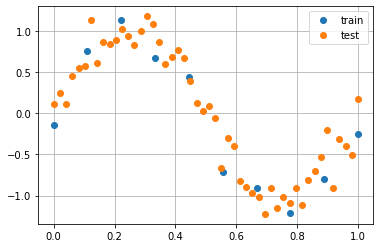

In [269]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.legend()
plt.grid()
plt.show()

In [270]:
train = pd.DataFrame( np.array([ y_train, x_train]).T, columns=['target', 'x'])
test = pd.DataFrame( np.array([ y_test, x_test]).T, columns=['target', 'x'])
df = pd.DataFrame( np.array([y, x]).T, columns=['target', 'x'] )

In [271]:
train['x2'] = train['x'] ** 2
train['x3'] = train['x'] ** 3
train['x4'] = train['x'] ** 4
train['x5'] = train['x'] ** 5
train['x6'] = train['x'] ** 6
train['x7'] = train['x'] ** 7
train['x8'] = train['x'] ** 8
train['x9'] = train['x'] ** 9

In [272]:
test['x2'] = test['x'] ** 2
test['x3'] = test['x'] ** 3
test['x4'] = test['x'] ** 4
test['x5'] = test['x'] ** 5
test['x6'] = test['x'] ** 6
test['x7'] = test['x'] ** 7
test['x8'] = test['x'] ** 8
test['x9'] = test['x'] ** 9

In [273]:
df['x2'] = df['x'] ** 2
df['x3'] = df['x'] ** 3
df['x4'] = df['x'] ** 4
df['x5'] = df['x'] ** 5
df['x6'] = df['x'] ** 6
df['x7'] = df['x'] ** 7
df['x8'] = df['x'] ** 8
df['x9'] = df['x'] ** 9

In [274]:
model = LinearRegression()
model.fit( train.loc[:,'x':], train['target'])

LinearRegression()

In [275]:
model.coef_

array([-1.70045741e+02,  4.15689626e+03, -3.76318383e+04,  1.76520228e+05,
       -4.80060685e+05,  7.84783001e+05, -7.59967118e+05,  4.01450695e+05,
       -8.90812387e+04])

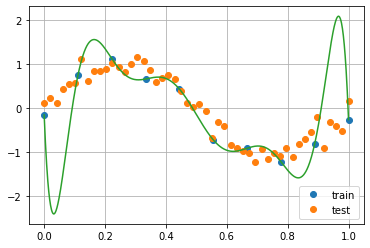

In [276]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot( df['x'], model.predict( df.loc[:, 'x':] ) )
plt.legend()
plt.grid()
plt.show()

### Ridge Regression

In [277]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

람다값이 0이면 정규화를 하지 않은 것(위에 값)과 동일

In [295]:
model = Ridge( alpha=0 )
model.fit( train.loc[:,'x':], train['target'])

Ridge(alpha=0)

In [296]:
model.coef_

array([-1.70256390e+02,  4.16174381e+03, -3.76753255e+04,  1.76723705e+05,
       -4.80612926e+05,  7.85684103e+05, -7.60838368e+05,  4.01910345e+05,
       -8.91831263e+04])

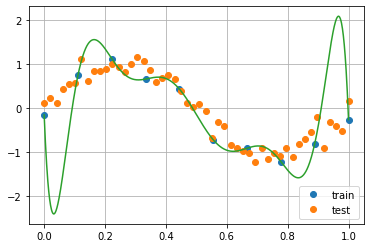

In [297]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot( df['x'], model.predict( df.loc[:, 'x':] ) )
plt.legend()
plt.grid()
plt.show()

람다가 너무 크면 과소적합

In [298]:
model = Ridge( alpha=1000 )
model.fit( train.loc[:,'x':], train['target'])

Ridge(alpha=1000)

In [300]:
model.coef_

array([-0.00162745, -0.0016414 , -0.0014025 , -0.00116401, -0.00096785,
       -0.00081342, -0.00069267, -0.00059775, -0.00052242])

람다가 너무 크니까 회귀계수들이 다 0에 수렴

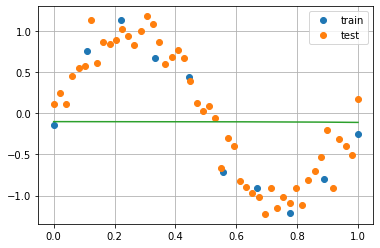

In [301]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot( df['x'], model.predict( df.loc[:, 'x':] ) )
plt.legend()
plt.grid()
plt.show()

따라서 적당한 람다값을 찾는 것이 중요.
이러한 과정이 정규화


In [302]:
model = Ridge( alpha=0.00001 )
model.fit( train.loc[:,'x':], train['target'])

Ridge(alpha=1e-05)

In [303]:
model.coef_

array([ 11.12586842, -26.84434857,   1.50262213,  11.53536348,
         8.29915027,   1.60416049,  -3.13395967,  -3.83574597,
        -0.36660062])

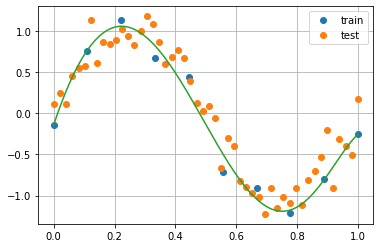

In [304]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot( df['x'], model.predict( df.loc[:, 'x':] ) )
plt.legend()
plt.grid()
plt.show()

### Lasso Regression
- 회귀계수들을 0으로 만들어서 하나씩 없앤다

In [305]:
model = Lasso( alpha=0.0001 )
model.fit( train.loc[:,'x':], train['target'])

Lasso(alpha=0.0001)

In [306]:
model.coef_

array([  9.99472818, -25.03382025,   4.52317805,   7.82668253,
         4.73926381,   1.56152158,   0.        ,  -1.01190095,
        -2.77192694])

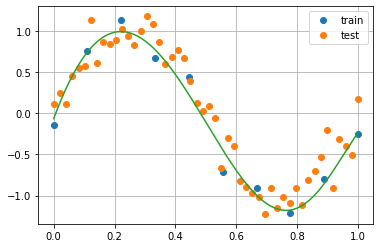

In [307]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot( df['x'], model.predict( df.loc[:, 'x':] ) )
plt.legend()
plt.grid()
plt.show()

### Elastic Net
- Ridge + Lasso

In [317]:
# l1_ratio=1 이면 라쏘와 동일
#l1_ratio=0 이면 릿지
model = ElasticNet( alpha=0.00001, l1_ratio=0.5 )
model.fit( train.loc[:,'x':], train['target'])

ElasticNet(alpha=1e-05)

In [318]:
model.coef_

array([ 10.16511259, -25.53688606,   4.81769052,   7.76159783,
         4.97592173,   1.95825131,  -0.21020889,  -1.63058129,
        -2.46943128])

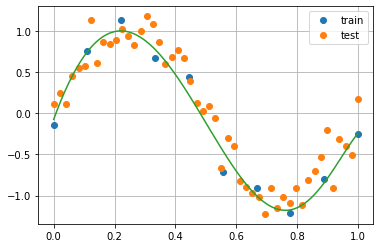

In [319]:
plt.plot( x_train, y_train, 'o', label='train' )
plt.plot( x_test, y_test, 'o', label='test' )
plt.plot( df['x'], model.predict( df.loc[:, 'x':] ) )
plt.legend()
plt.grid()
plt.show()